In [1]:
from aux import compute_graphs, print_and_analyze_graph, construct_program

import clingo
from clingox.reify import reify_program

In [2]:
num_nodes = 10

# Generate any graph with the given number of nodes
gen_program = f"""
    #const n={num_nodes}.
"""
gen_program += """
    node(1..n).
    { edge(X,Y) } :- node(X), node(Y), X != Y.
    edge(X,Y) :- edge(Y,X).
"""

program = construct_program(
    gen_program,
    max_indset_lower = 4,
    max_indset_upper = 6,
    min_domset_size = 4,
    sym_breaking = False,
    require_3col = True,
    require_ham_cycle = True,
    require_planar = True,
    forbid_2col = False,
    require_ids_larger_than_ds = False,
)

In [3]:
graphs = compute_graphs(
    program,
    verbose=True,
    num_models=1,
)

.. Grounding ..
.. Solving ..
.
.. Done solving ..
Total solving time: 9.04 sec


GRAPH: node(1). node(2). node(3). node(4). node(5). node(6). node(7). node(8). node(9). node(10). edge(7,1). edge(9,1). edge(9,2). edge(10,2). edge(4,3). edge(5,3). edge(8,3). edge(9,3). edge(10,3). edge(3,4). edge(5,4). edge(7,4). edge(8,4). edge(3,5). edge(4,5). edge(6,5). edge(5,6). edge(8,6). edge(1,7). edge(4,7). edge(3,8). edge(4,8). edge(6,8). edge(1,9). edge(2,9). edge(3,9). edge(2,10). edge(3,10).
 - Num nodes: 10
 - Num edges: 14
 - Min VC size: 5
 - Min DS size: 4
 - Max IS size: 5
 - Min IDS size: 4
 - Has Hamiltonian cycle: True
 - Is 2-colorable: False
 - Is 3-colorable: True
 - Degree: 5


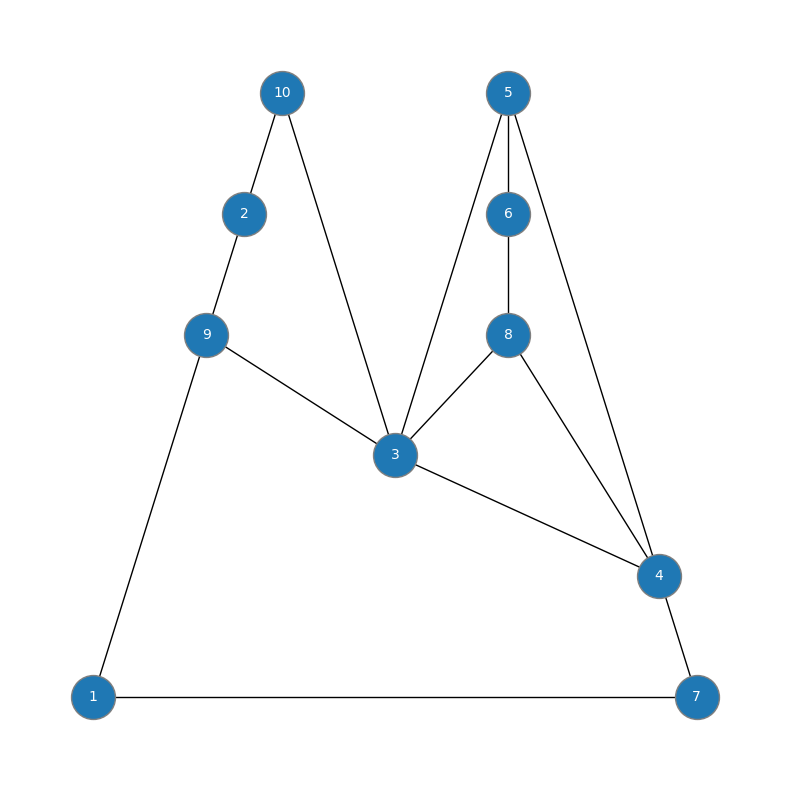

In [4]:
for graph in graphs:
    print_and_analyze_graph(graph)